In [1]:
from impedance import preprocessing

In [2]:
frequencies, Z = preprocessing.readCSV('Downloads/exampleData.csv')

In [3]:
from impedance.models.circuits import CustomCircuit

circuit = 'R0-p(R1,C1)-p(R2-Wo1,C2)'
initial_guess = [.01, .01, 100, .01, .05, 100, 1]

circuit = CustomCircuit(circuit, initial_guess=initial_guess)

In [4]:
circuit.fit(frequencies, Z)

C:\Users\20224751\AppData\Local\miniconda3\envs\impedance-analysis\Lib\site-packages\impedance\models\circuits\elements.py:170: RuntimeWarning: overflow encountered in tanh
  Z = Z0 / (np.sqrt(1j * omega * tau) * np.tanh(np.sqrt(1j * omega * tau)))


In [5]:
import warnings

# Suppress tanh overflow warning
warnings.filterwarnings("ignore", category=RuntimeWarning, module="impedance.models.circuits.elements")

In [6]:
circuit.fit(frequencies, Z)

In [7]:
circuit.parameters_

array([1.59992230e-02, 8.76307395e-03, 3.27606244e+00, 5.81139952e-03,
       6.31419585e-02, 2.32727880e+02, 1.97923298e-01])

In [8]:
print(circuit) #the values will be displayed after the fitting ## 


Circuit string: R0-p(R1,C1)-p(R2-Wo1,C2)
Fit: True

Initial guesses:
     R0 = 1.00e-02 [Ohm]
     R1 = 1.00e-02 [Ohm]
     C1 = 1.00e+02 [F]
     R2 = 1.00e-02 [Ohm]
  Wo1_0 = 5.00e-02 [Ohm]
  Wo1_1 = 1.00e+02 [sec]
     C2 = 1.00e+00 [F]

Fit parameters:
     R0 = 1.60e-02  (+/- 3.75e-04) [Ohm]
     R1 = 8.76e-03  (+/- 6.65e-04) [Ohm]
     C1 = 3.28e+00  (+/- 6.49e-01) [F]
     R2 = 5.81e-03  (+/- 6.72e-04) [Ohm]
  Wo1_0 = 6.31e-02  (+/- 6.93e-03) [Ohm]
  Wo1_1 = 2.33e+02  (+/- 5.80e+01) [sec]
     C2 = 1.98e-01  (+/- 4.40e-02) [F]



In [9]:
Z_fit = circuit.predict(frequencies)

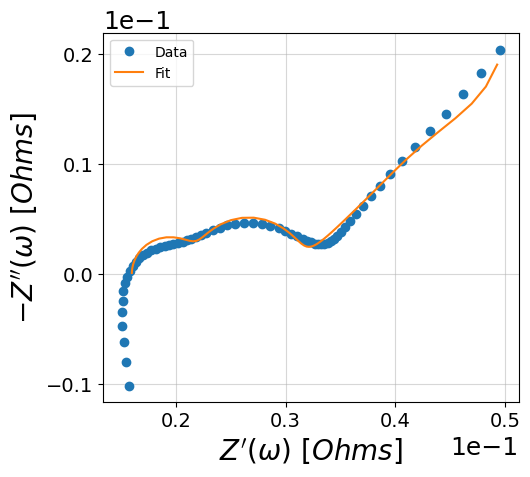

In [10]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=10, ax=ax)
plot_nyquist(Z_fit, fmt='-', scale=10, ax=ax)

plt.legend(['Data', 'Fit'])
plt.show()